## Concerts
🤘🏻🤘🏻🤘🏻

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
sheet_id = "1t8yUN7srGyxqWzXTJfoeZOGyyF8iK6DNl-qqL-8mWUI"
sheet_name = "Concerts"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

In [3]:
df = pd.read_csv(url)
df.head()

,Band,Date,Location,State,City,Ticket Price [EUR],Act,Notes
0,Machine Head,19.04.2018,Gasometer,Austria,Vienna,"39,99",Headliner,NaN
1,Scorpions,02.08.2019,Burg Clam,Austria,Vienna,"72,90",Headliner,NaN
2,Battle Beast,22.02.2020,Gasometer,Austria,Vienna,NaN,Support,NaN
3,Powerwolf,06.11.2018,Arena Wien,Austria,Vienna,"34,50",Headliner,Wolfsnächte
4,Slash,10.02.2019,Gasometer,Austria,Vienna,"57,99",Headliner,NaN


In [4]:
df['price'] = pd.to_numeric(df['Ticket Price [EUR]'].replace(',', '.', regex=True))
# new comment
df['Date'] = pd.to_datetime(df['Date'], format="%d.%m.%Y")
df['year'] = df['Date'].dt.strftime('%Y') # pd.to_numeric(df['Date'].dt.strftime('%Y'))

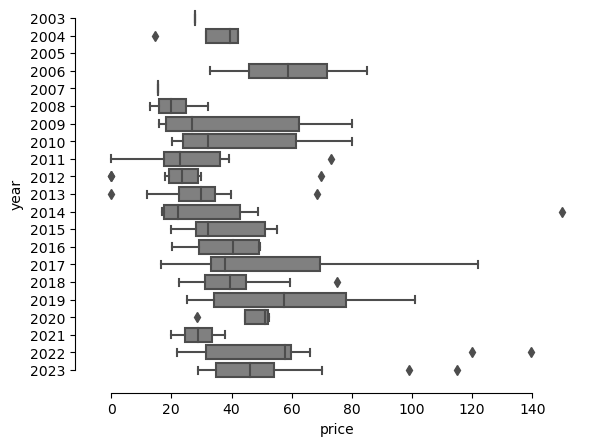

In [5]:
sns.boxplot(y="year", x="price", data=df, color='grey', order=sorted(df['year'].unique()))
sns.despine(offset=10, trim=True)

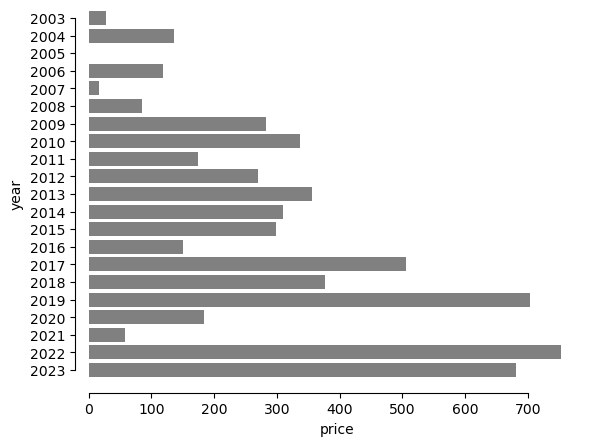

In [6]:
# bis exkl. hier
sum_per_year = df.groupby('year')['price'].sum().reset_index()
sns.barplot(x='price', y='year', data=sum_per_year, color='grey', order=sorted(df['year'].unique()))
sns.despine(offset=10, trim=True)

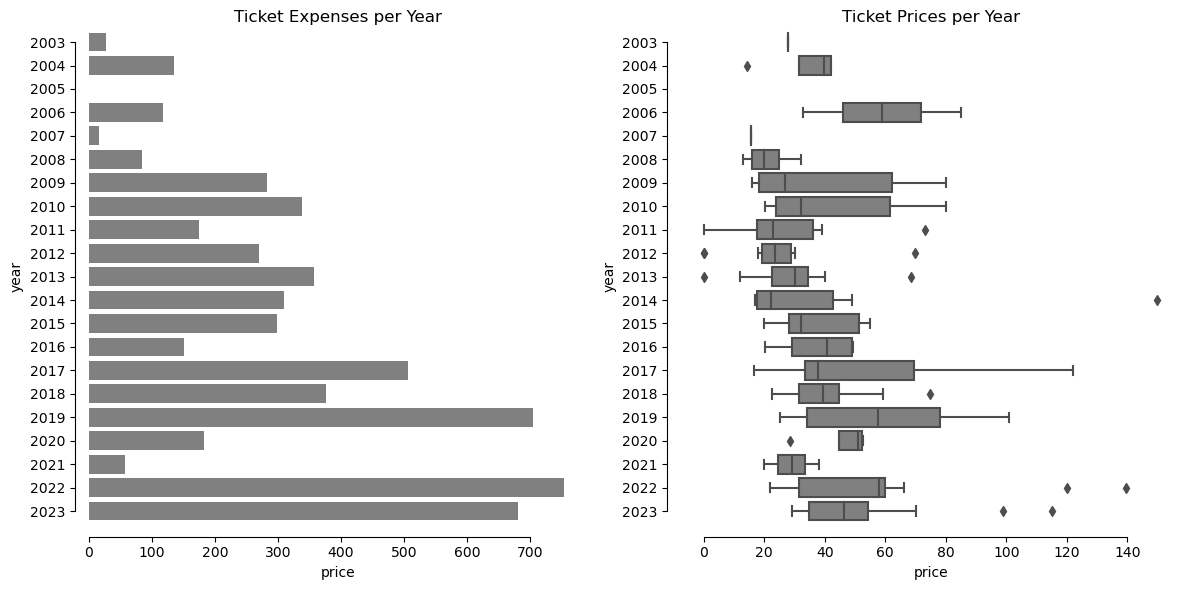

In [7]:
# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bara chart
sns.barplot(x='price', y='year', data=sum_per_year, color='grey', ax=ax1)
sns.despine(offset=10, trim=True, ax=ax1)
ax1.set_title('Ticket Expenses per Year')

# Box plot
sns.boxplot(y="year", x="price", data=df, color='grey', order=sorted(df['year'].unique()), ax=ax2)
sns.despine(offset=10, trim=True, ax=ax2)
ax2.set_title('Ticket Prices per Year')

# Adjust the layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

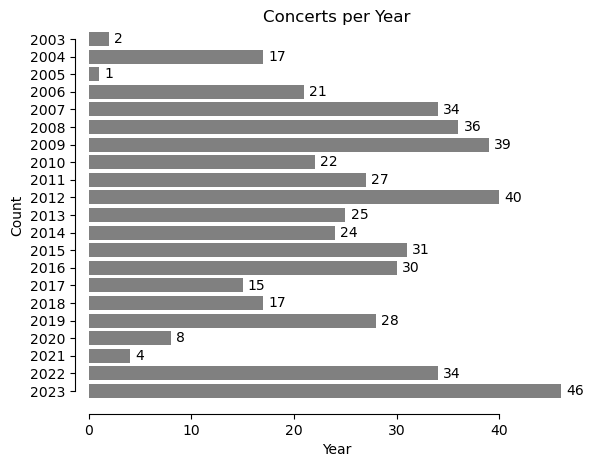

In [8]:
data_distribution = df.groupby(['year']).size().reset_index(name='Count')
sns.barplot(x='Count', y='year', data=data_distribution, color='grey')
sns.despine(offset=10, trim=True)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Concerts per Year')

for index, row in data_distribution.iterrows():
    plt.text(row['Count'] + 0.5, index, str(row['Count']), ha='left', va='center', fontsize=10, color='black')

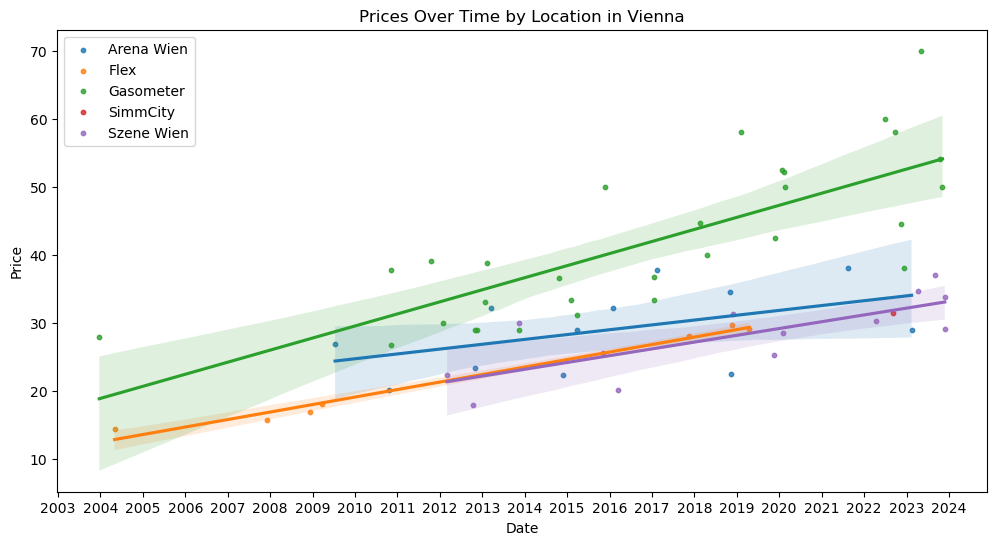

In [9]:
import matplotlib.dates as mdates
# Assuming your DataFrame is named 'concert_data'
df_vienna = df[df['Location'].isin(["Flex", "Szene Wien", "SimmCity", "Arena Wien", "Gasometer", "Wiener Stadthalle"])] 
df_vienna = df_vienna.dropna(subset=['price'])
# Sort the data by the 'Date' column
# Sort the data by the 'Date' column
df_vienna = df_vienna.sort_values(by='Date')

# Group the data by location
grouped = df_vienna.groupby('Location')

# Create a scatter plot with regression lines for each location
plt.figure(figsize=(12, 6))
for location, group in grouped:
    x = mdates.date2num(group['Date'])  # Convert 'Date' to numeric values
    y = group['price']
    sns.regplot(x=x, y=y, label=location, scatter_kws={'s': 10})

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Prices Over Time by Location in Vienna')

# Set x-axis tick locations to January 1st of each year
min_year = pd.to_datetime(df_vienna['Date']).dt.year.min()
max_year = pd.to_datetime(df_vienna['Date']).dt.year.max()
years = list(range(min_year, max_year + 2))
january_1st = [pd.Timestamp(year, 1, 1) for year in years]
plt.xticks(january_1st, years, rotation=0)

plt.show()

In [10]:
data = {
    'year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'inflationRate': [2.3, 2.7, 1.8, 1.3, 2.1, 2.3, 1.5, 2.2, 3.2, 0.5, 1.9, 3.3, 2.4, 2.0, 1.7, 0.9, 0.9, 2.1, 2.0, 1.5, 1.4, 2.8, 8.6, 8.36]
}

inflation_df = pd.DataFrame(data)
inflation_df['year'] = inflation_df['year'].astype(int)
inflation_df['InflationFactor'] = (1 + inflation_df['inflationRate'] / 100).cumprod()
inflation_df.dtypes

year                 int64
inflationRate      float64
InflationFactor    float64
dtype: object

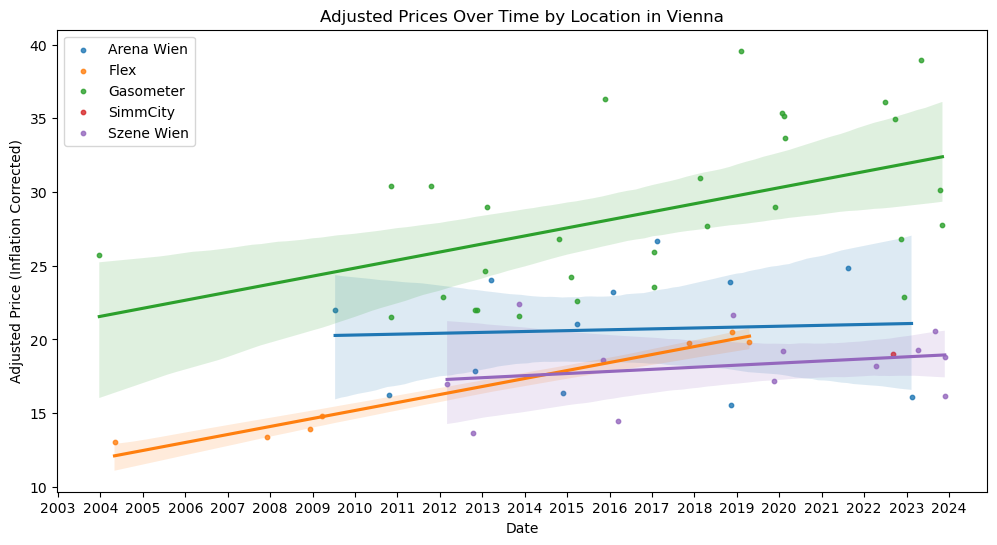

In [11]:


# Create a copy of the DataFrame to store adjusted prices
df_corrected = df_vienna.copy()

# Create a new column for adjusted prices and initialize it with the original prices
df_corrected['AdjustedPrice'] = df_corrected['price']

# Adjust ticket prices for inflation and store them in the 'AdjustedPrice' column
for year, factor in zip(inflation_df['year'], inflation_df['InflationFactor']):
    df_corrected.loc[df_corrected['Date'].dt.year == year, 'AdjustedPrice'] = df_corrected.loc[df_corrected['Date'].dt.year == year, 'price'] / factor

# Sort the corrected data by the 'Date' column
df_corrected = df_corrected.sort_values(by='Date')

# Group the data by location
grouped = df_corrected.groupby('Location')

# Create a scatter plot with regression lines for each location using adjusted prices
plt.figure(figsize=(12, 6))
for location, group in grouped:
    x = mdates.date2num(group['Date'])  # Convert 'Date' to numeric values
    y = group['AdjustedPrice']
    sns.regplot(x=x, y=y, label=location, scatter_kws={'s': 10})

plt.xlabel('Date')
plt.ylabel('Adjusted Price (Inflation Corrected)')
plt.legend()
plt.title('Adjusted Prices Over Time by Location in Vienna')

# Set x-axis tick locations to January 1st of each year
min_year = pd.to_datetime(df_corrected['Date']).dt.year.min()
max_year = pd.to_datetime(df_corrected['Date']).dt.year.max()
years = list(range(min_year, max_year + 2))
january_1st = [pd.Timestamp(year, 1, 1) for year in years]
plt.xticks(january_1st, years, rotation=0)

plt.show()

In [12]:
df_corrected

,Band,Date,Location,State,City,Ticket Price [EUR],Act,Notes,price,year,AdjustedPrice
183,Die Ärzte,2003-12-23,Gasometer,Austria,Vienna,"27,90",Headliner,Jenseits der Grenze des Zumutbaren Tour - http...,27.9,2003,25.751403
27,Backyard Babies,2004-05-02,Flex,Austria,Vienna,"14,40",Headliner,www3.earshot.at/php/content/live_ok.php?action...,14.4,2004,13.017676
118,Hardcore Superstar,2007-12-06,Flex,Austria,Vienna,"15,70",Headliner,NaN,15.7,2007,13.374515
5,Airbourne,2008-12-08,Flex,Austria,Vienna,"16,90",Headliner,NaN,16.9,2008,13.950359
70,Danko Jones,2009-03-20,Flex,Austria,Vienna,"18,00",Headliner,NaN,18.0,2009,14.784449
...,...,...,...,...,...,...,...,...,...,...,...
490,Heat,2023-09-05,Szene Wien,Austria,Vienna,"37,00",Headliner,Double Headliner Tour,37.0,2023,20.588968
491,Blind Guardian,2023-10-17,Gasometer,Austria,Vienna,"54,10",Headliner,"The God Machine Tour 2023, support: Dawn of Ex...",54.1,2023,30.104410
493,Pertubator,2023-11-06,Gasometer,Austria,Vienna,"49,90",Headliner,Leather Sacrements Tour - Co-Headlinder with C...,49.9,2023,27.767284
497,Mr. Hurley & Die Pulveraffen,2023-11-25,Szene Wien,Austria,Vienna,"33,80",Headliner,NaN,33.8,2023,18.808301


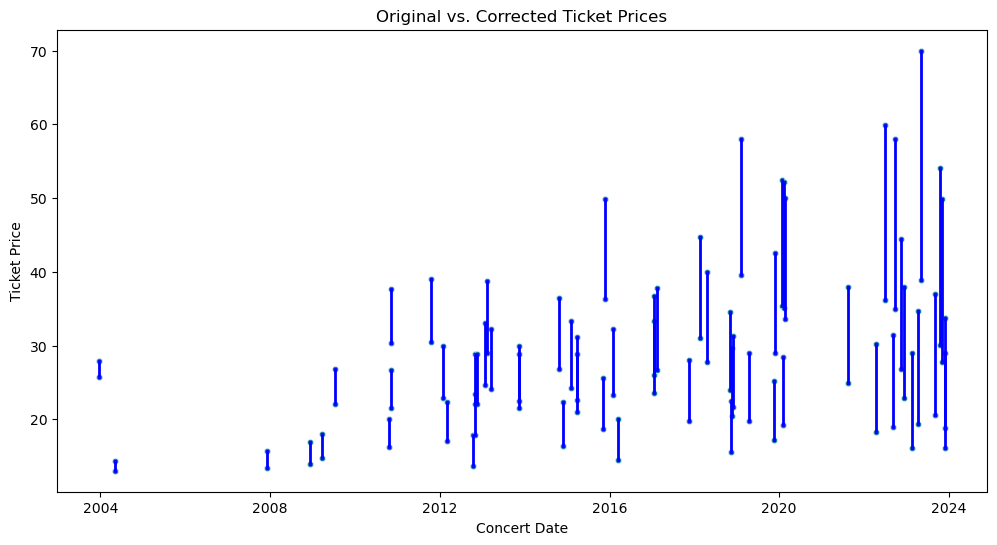

In [13]:
df_combined = pd.concat([df_corrected[['Date', 'price']].rename(columns={'price': 'TicketPrice', 'Date': 'ConcertDate'}),
                         df_corrected[['Date', 'AdjustedPrice']].rename(columns={'AdjustedPrice': 'TicketPrice', 'Date': 'ConcertDate'})],
                        ignore_index=True)

# Sort the combined data by 'ConcertDate'
df_combined = df_combined.sort_values(by='ConcertDate')

# Create the scatterplot with original and corrected prices
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_combined, x='ConcertDate', y='TicketPrice', s=20, legend=None)

# Add lines connecting the two marks for each concert
for i in range(1, len(df_combined), 2):
    plt.plot(df_combined['ConcertDate'].iloc[i-1:i+1], df_combined['TicketPrice'].iloc[i-1:i+1], color='blue', linestyle='-', linewidth=2)

plt.xlabel('Concert Date')
plt.ylabel('Ticket Price')
plt.title('Original vs. Corrected Ticket Prices')

plt.show()

In [14]:
df_corrected.to_csv('df_corrected.csv', index=False)

In [15]:
df_combined.to_csv('df_combined.csv', index=False)